# Ch 2 - Mathematical Building Blocks of Neural Networks

Understanding deep learning requires familiarity with many simple mathematical concepts: tensors, tensor operations, differentiation, gradient descent, and so on.

## 2.1 A First Look at a Neural Network



The problem we’re trying to solve is to classify grayscale images of handwritten digits (28 × 28 pixels) into their 10 categories (0 through 9). We’ll use the MNIST dataset, a classic in the machine-learning community, which has been around almost as long as the field itself and has been intensively studied. It’s a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. You can think of “solving” MNIST as the “Hello World” of deep learning—it’s what you do to verify that your algorithms are working as expected.

Note on classes and labels:
- In machine learning, a category in a classification problem is called a class. Data points are called samples. The class associated with a specific sample is called a label.

![MNIST](Images/02_01.jpg)



In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
import requests
import ssl

import numpy as np

requests.packages.urllib3.disable_warnings()


try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

*train_images* and *train_labels* form the training set, the data that the model will learn from.

The model will then be tested on the test set, *test_images* and *test_labels*.

The images are encoded as Numpy arrays, and the labels are an array of digits, ranging from 0 to 9. The images and labels have a one-to-one correspondence.

#### Training Data:

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

#### Testing Data:

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

First, we’ll feed the neural network the training data, train_images and train_labels. The network will then learn to associate images and labels. 

Then we’ll ask the network to produce predictions for test_images and verify whether these predictions match the labels from test_labels.

#### The Network Architecture

In [10]:
from keras import models
from keras import layers

In [11]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

The core building block of a neural network is the layer, a data-processing module that you can think of as a filter for data. Some data goes in, and it comes out in a more useful form. Specifically, layers extract representations out of the data fed into them—hopefully, representations that are more meaningful for the problem at hand. Most of deep learning consists of chaining together simple layers that will implement a form of progressive data distillation. A deep-learning model is like a sieve for data processing, made of a succession of increasingly refined data filters—the layers.


Here, our network consists of a sequence of two Dense layers, which are densely connected (also called fully connected) neural layers. The second (and last) layer is a 10-way softmax layer, which means it will return an array of 10 probability scores (summing to 1). Each score will be the probability that the current digit image belongs to one of our 10 digit classes.


To make the network ready for training, we need to pick three more things, as part of the compilation step:

- A loss function: how the network will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.

- An optimizer: the mechanism through which the network will update itself based on the data it sees and its loss function.

- Metrics to monitor during training and testing: here, we'll only care about the accuracy (the fraction of the images that were correctly classified).

#### The Compilation Step

In [12]:
network.compile(optimizer='rmsprop',\
                loss='categorical_crossentropy',\
                metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


Before training, we'll preprocess the data by reshaping it into the shape the network expects and scaling it so that all values are in the [0, 1] interval. Previously, our training images, for instance, were stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval. We transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1.

#### Preparing the Image Data

In [13]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

#### Preparing the Labels

In [14]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Next we will train the network, which in Keras is done via a call to the network's fit method - we fit the model to its training data:

In [15]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.2535 - acc: 0.9256
Epoch 2/5
60000/60000 [==============================] - 3s 55us/step - loss: 0.1033 - acc: 0.9699
Epoch 3/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.0678 - acc: 0.9794
Epoch 4/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.0494 - acc: 0.9852
Epoch 5/5
60000/60000 [==============================] - 3s 55us/step - loss: 0.0364 - acc: 0.9892


Two quantities are displayed during training: the loss of the network over the training data, and the accuracy of the network over the training data.

In [16]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 47us/step
test_acc: 0.9805


The test-set accuracy turns out to be 97.8%—that’s quite a bit lower than the training set accuracy. This gap between training accuracy and test accuracy is an example of overfitting: the fact that machine-learning models tend to perform worse on new data than on their training data.

## 2.2 Data Representations for Neural Networks

In the previous example, we started from data stored in multidimensional Numpy arrays, also called tensors. In general, all current machine-learning systems use tensors as their basic data structure. Tensors are fundamental to the field—so fundamental that Google’s TensorFlow was named after them.


At its core, a tensor is a container for data—almost always numerical data. So, it’s a container for numbers. You may be already familiar with matrices, which are 2D tensors: tensors are a generalization of matrices to an arbitrary number of dimensions (note that in the context of tensors, a dimension is often called an axis).


### 2.2.1 Scalars (0D Tensors)

A tensor that contains only one number is called a scalar (or scalar tensor, or 0-dimensional tensor, or 0D tensor). In Numpy, a float32 or float64 number is a scalar tensor (or scalar array). You can display the number of axes of a Numpy tensor via the ndim attribute; a scalar tensor has 0 axes (ndim == 0). The number of axes of a tensor is also called its rank.

#### Here’s a Numpy scalar:

In [17]:
import numpy as np

x = np.array(12)

x

array(12)

In [18]:
x.ndim

0

### 2.2.2 Vectors (1D Tensors)

An array of numbers is called a vector, or 1D tensor. A 1D tensor is said to have exactly one axis. 

#### Here's a Numpy vector:

In [19]:
x = np.array([12, 3, 6, 14])

x

array([12,  3,  6, 14])

In [20]:
 x.ndim

1

This vector has five entries and so is called a 5-dimensional vector. Don’t confuse a 5D vector with a 5D tensor! A 5D vector has only one axis and has five dimensions along its axis, whereas a 5D tensor has five axes (and may have any number of dimensions along each axis). Dimensionality can denote either the number of entries along a specific axis (as in the case of our 5D vector) or the number of axes in a tensor (such as a 5D tensor), which can be confusing at times. In the latter case, it’s technically more correct to talk about a tensor of rank 5 (the rank of a tensor being the number of axes), but the ambiguous notation 5D tensor is common regardless. 

### 2.2.3 Matrices (2D Tensors)

An array of vectors is a matrix, or 2D tensor. A matrix has two axes (often referred to rows and columns). You can visually interpret a matrix as a rectangular grid of numbers.

#### Here's a Numpy matrix:

In [21]:
x = np.array([[5, 78, 2, 34, 0],\
              [6, 79, 3, 35, 1],\
              [7, 80, 4, 36, 2]])

x

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

In [22]:
x.ndim

2

The entries from the first axis are called the rows, and the entries from the second axis are called the columns. In the previous example, [5, 78, 2, 34, 0] is the first row of x, and [5, 6, 7] is the first column. 

### 2.2.4 3D Tensors and Higher-Dimensional Tensors

If you pack such matrices in a new array, you obtain a 3D tensor, which you can visually interpret as a cube of numbers.

#### Here's a 3D Tensor:

In [23]:
x = np.array([[[5, 78, 2, 34, 0],\
               [6, 79, 3, 35, 1],\
               [7, 80, 4, 36, 2]],\
              [[5, 78, 2, 34, 0],\
               [6, 79, 3, 35, 1],\
               [7, 80, 4, 36, 2]],\
              [[5, 78, 2, 34, 0],\
               [6, 79, 3, 35, 1],\
               [7, 80, 4, 36, 2]]])

x

array([[[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]]])

In [24]:
x.ndim

3

By packing 3D tensors in an array, you can create a 4D tensor, and so on. In deep learning, you’ll generally manipulate tensors that are 0D to 4D, although you may go up to 5D if you process video data. 

### 2.2.5 Key Attributes


A tensor is defined by three key attributes:

- Number of axes (rank): For instance, a 3D tensor has three axes, and a matrix has two axes. This is also called the tensor’s ndim in Python libraries such as Numpy.

- Shape: This is a tuple of integers that describes how many dimensions the tensor has along each axis. For instance, the previous matrix example has shape (3, 5), and the 3D tensor example has shape (3, 3, 5). A vector has a shape with a single element, such as (5,), whereas a scalar has an empty shape, ().

- Data type (usually called dtype in Python libraries): This is the type of the data contained in the tensor; for instance, a tensor’s type could be float32, uint8, float64, and so on. On rare occasions, you may see a char tensor. Note that string tensors don’t exist in Numpy (or in most other libraries), because tensors live in preallocated, contiguous memory segments: and strings, being variable length, would preclude the use of this implementation.


To make this more concrete, let’s look back at the data we processed in the MNIST example. First, we load the MNIST dataset:


In [25]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [26]:
print(train_images.ndim)

3


In [27]:
print(train_images.shape)

(60000, 28, 28)


In [28]:
print(train_images.dtype)

uint8


So what we have here is a 3D tensor of 8-bit integers. More precisely, it’s an array of 60,000 matrices of 28 × 8 integers. Each such matrix is a grayscale image, with coefficients between 0 and 255.

#### Displaying the Fourth Digit

In [35]:
digit = train_images[4]

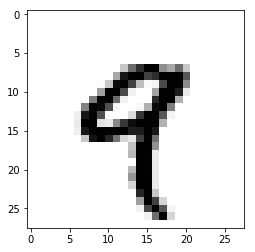

In [34]:
import matplotlib.pyplot as plt

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### 2.2.6 Manipulating Tensors in Numpy

In the previous example, we selected a specific digit alongside the first axis using the syntax train_images[i]. Selecting specific elements in a tensor is called tensor slicing. Let’s look at the tensor-slicing operations you can do on Numpy arrays.


The following example selects digits #10 to #100 (#100 isn’t included) and puts them in an array of shape (90, 28, 28):

In [31]:
my_slice = train_images[10:100]

print(my_slice.shape)

(90, 28, 28)


It’s equivalent to this more detailed notation, which specifies a start index and stop index for the slice along each tensor axis. Note that : is equivalent to selecting the entire axis:


![slicing](Images/02_02.jpg)

In general, you may select between any two indices along each tensor axis. For instance, in order to select 14 × 14 pixels in the bottom-right corner of all images, you do this:

In [32]:
my_slice = train_images[:, 14:, 14:]

It’s also possible to use negative indices. Much like negative indices in Python lists, they indicate a position relative to the end of the current axis. In order to crop the images to patches of 14 × 14 pixels centered in the middle, you do this:

In [33]:
my_slice = train_images[:, 7:-7, 7:-7]

### 2.2.7 The Notion of Data Batches

In general, the first axis (axis 0, because indexing starts at 0) in all data tensors you’ll come across in deep learning will be the **samples axis** (sometimes called the samples dimension). In the MNIST example, samples are images of digits.

In addition, deep-learning models don’t process an entire dataset at once; rather, they break the data into small batches. Concretely, here’s one batch of our MNIST digits, with batch size of 128:



In [36]:
batch = train_images[:128]

Here is the next batch:

In [37]:
batch = train_images[128:256]

Here is the **n**th batch:

In [ ]:
batch = train_images[128 * n:128 * (n + 1)]

When considering such a batch tensor, the first axis (axis 0) is called the batch axis or batch dimension. This is a term you’ll frequently encounter when using Keras and other deep-learning libraries. 

### 2.2.8 Real-World Examples of Data Tensors

The data you’ll manipulate will almost always fall into one of the following categories:
    
- Vector data: 2D tensors of shape (samples, features)

- Timeseries data or sequence data: 3D tensors of shape (samples, timesteps, features)

- Images: 4D tensors of shape (samples, height, width, channels) or (samples, channels, height, width)

- Video: 5D tensors of shape (samples, frames, height, width, channels) or (samples, frames, channels, height, width)

### 2.2.9 Vector Data

### 2.2.10 Timeseries Data or Sequence Data

### 2.2.11 Image Data

### 2.2.12 Video Data

## 2.3 The Gears of Neural Networks: Tensor Operations

### 2.3.1 Element-Wise Operations

### 2.3.2 Broadcasting

### 2.3.3 Tensor Dot

### 2.3.4 Tensor Reshaping

### 2.3.5 Geometric Interpretation of Tensor Operations

### 2.3.6 A Geometric Interpretation of Deep Learning

## 2.4 The Engine of Neural Networks: Gradient-Based Optimization

### 2.4.1 What's a Derivative?

### 2.4.2 Derivative of a Tensor Operation: the Gradient

### 2.4.3 Stochastic Gradient Descent

### 2.4.4 Chaining Derivatives: the Backpropagation Algorithm

## 2.5 Looking Back at our First Example